In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers, Input
import matplotlib.pyplot as plt
import numpy as np

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS=3
CHANNELS=3

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Data',shuffle=True, image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_labels = dataset.class_names
class_labels

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset) # batches

68

In [10]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
for image_batch, label_batch in dataset:
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 1 2 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 2 0 0 2 0]
(32, 256, 256, 3)
[2 1 2 0 0 0 0 1 1 1 0 0 1 1 0 2 0 1 1 0 0 1 0 2 0 1 1 1 0 1 1 0]
(32, 256, 256, 3)
[0 2 0 0 0 1 0 0 1 2 1 1 0 0 0 0 0 0 0 1 1 0 1 2 0 0 0 0 2 1 0 1]
(32, 256, 256, 3)
[1 0 1 2 2 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1]
(32, 256, 256, 3)
[1 0 1 0 0 2 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1]
(32, 256, 256, 3)
[1 1 0 1 2 1 1 2 1 1 0 1 1 1 1 0 0 0 1 0 2 1 1 2 0 0 1 0 0 1 0 1]
(32, 256, 256, 3)
[1 1 0 1 1 2 2 1 1 1 0 1 2 0 0 1 1 0 1 2 1 1 0 1 0 0 2 0 1 0 0 1]
(32, 256, 256, 3)
[0 0 0 0 1 1 1 2 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 2 2 0 1 0 1 1 0]
(32, 256, 256, 3)
[0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 2 0 1 2 1 0 0 0 0 0 1 1 2 2]
(32, 256, 256, 3)
[1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 2 1 0 1 1 1 0 1]
(32, 256, 256, 3)
[1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 2 2 0 1 0 1]
(32, 256, 256, 3)
[0 0 1 1 1 1 1 1 0 0 1 1 2 0 0 0 0 1 1 0 1 0 1 1 0 2 1 0 1

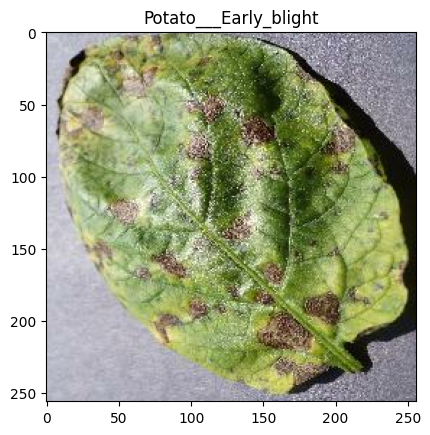

In [12]:
#shuffle thats why randomnes
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_labels[label_batch[0]])
    

In [13]:
# Split in train(80)-test(10-10val)
train_size = 0.8
test_size = 1 - train_size
train = dataset.take(int(len(dataset)*train_size))
len(train)

54

In [14]:
test = dataset.skip(54)
len(test)

14

In [15]:
testing = test.take(7)
validation = test.skip(7)

In [16]:
len(testing), len(validation)

(7, 7)

In [17]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testing = testing.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation = validation.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
# resize_and_rescale = tf.keras.Sequential([
#     layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     layers.Rescaling(1.0/255)
# ])

In [19]:
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip('horizontal_and_vertical'),
#     layers.RandomRotation(0.2)
# ])

In [20]:
# model = models.Sequential([
#     Input(batch_shape=(BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
#     resize_and_rescale,
#     data_augmentation,
#     layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(3, activation='softmax'),
# ])

In [21]:
# model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [22]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )

In [23]:
# history = model.fit(
#     train, epochs=4, batch_size=BATCH_SIZE, verbose=1, validation_data=validation
# )

In [24]:
# model.save('my_modelv1.keras')

In [25]:
model = tf.keras.models.load_model('./my_model.keras')

In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551,243 (2.10 MB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 367,496 (1.40 MB)

In [27]:
model.evaluate(testing)  #[Loss, Accuracy]

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.9273 - loss: 0.1643


[0.15693506598472595, 0.9330357313156128]

In [28]:
# #Plotting Training & Validation Accuracy
# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='val')
# plt.legend()

In [29]:
# #Plotting Training & Validation loss
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='val')
# plt.legend()

first image to predict
first image actual label: Potato___Late_blight
Prediction: Potato___healthy


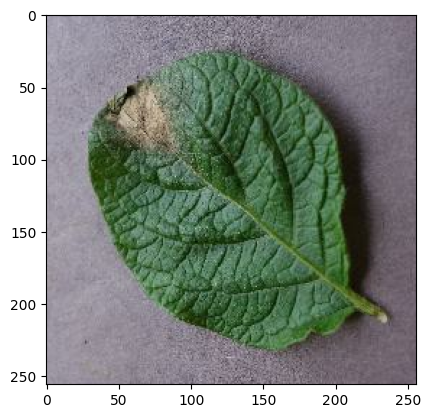

In [30]:
for image_batch, labels_batch in testing.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print('first image to predict')
    plt.imshow(first_image)
    print(f'first image actual label: {class_labels[first_label]}')
    batch_prediction = model.predict(image_batch, verbose=0)
    first_img_pred = class_labels[np.argmax(batch_prediction[0])]
    print(f'Prediction: {first_img_pred}')

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)# Create a batch
    
    prediction= model.predict(img_array, verbose=0)
    
    predicted_class = class_labels[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)
    return predicted_class, confidence

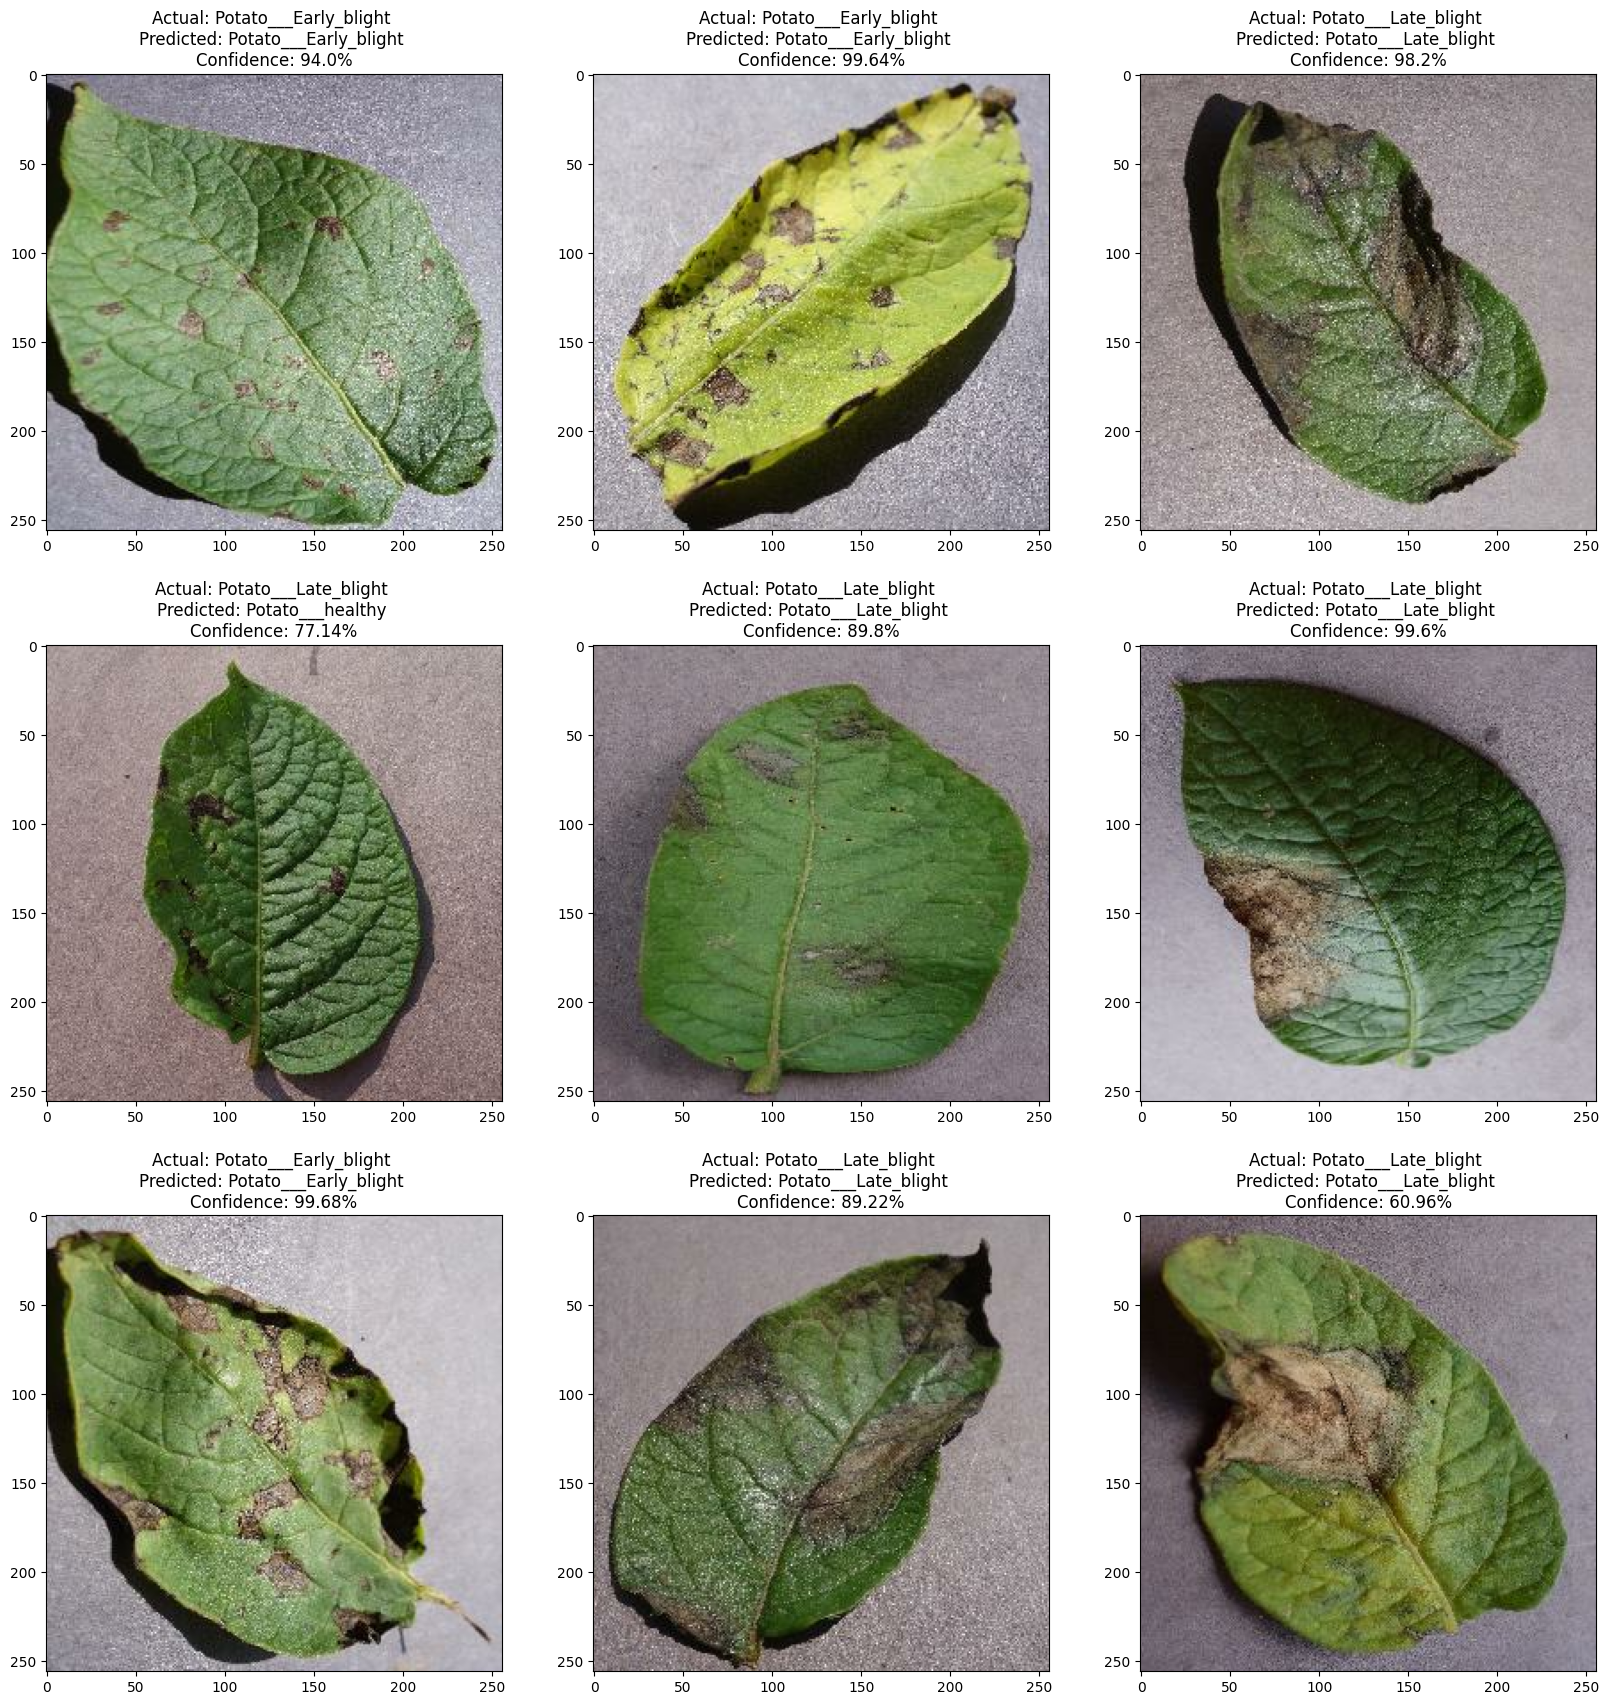

In [32]:
plt.figure(figsize=(20, 21))
for images, labels in testing.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, conf = predict(model, images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f'Actual: {actual_class} \nPredicted: {predicted_class} \nConfidence: {conf}%')